### **DATA COLLECTION**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
files.upload()
##Upload Kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"maheswaraaw","key":"7b02121f1128b65f23eb41ccf97ecc71"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d yersever/500-person-gender-height-weight-bodymassindex -p /content

  0% 0.00/2.26k [00:00<?, ?B/s]
100% 2.26k/2.26k [00:00<00:00, 4.35MB/s]


In [5]:
from zipfile import ZipFile
file_name = "/content/500-person-gender-height-weight-bodymassindex.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


### **PREPROCESSING**

In [6]:
data = pd.read_csv('/content/500_Person_Gender_Height_Weight_Index.csv')
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

In [7]:
def CalcBMI(row):
    return row['Weight'] / ((row['Height']/100)**2)

data['BMI'] = data.apply(CalcBMI, axis=1)

In [8]:
print(data['Index'].describe())

count    500.000000
mean       3.748000
std        1.355053
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64


In [9]:
data.loc[data['Index'] == 0, 'Index'] = 1

In [10]:
data=data.rename(columns={'Index': 'Physical_Type'})

In [11]:
print(data['Physical_Type'].describe())

count    500.000000
mean       3.774000
std        1.290836
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Physical_Type, dtype: float64


In [12]:
def conv_to_pt(x):
    if x['BMI'] < 18.75:
        return 'Underweight'
    elif x['BMI'] >= 18.75 and  x['BMI'] < 25:
        return 'Normal'
    elif x['BMI'] >= 25 and  x['BMI'] < 30:
        return 'Overweight'
    elif x['BMI'] >= 30 and  x['BMI'] < 40:
        return 'Obesity'
    elif x['BMI'] >= 40:
        return 'Severe Obesity'
data['Status'] = data.apply(conv_to_pt,axis=1)
data.head()

,Gender,Height,Weight,Physical_Type,BMI,Status
0,Male,174,96,4,31.708284,Obesity
1,Male,189,87,2,24.355421,Normal
2,Female,185,110,4,32.140248,Obesity
3,Female,195,104,3,27.350427,Overweight
4,Male,149,61,3,27.476240,Overweight


In [13]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
data['Binary'] = data.apply(convert_gender_to_label,axis=1)

data = data[['Gender', 'Binary', 'Weight', 'Height', 'BMI', 'Status', 'Physical_Type']]
data.head()

,Gender,Binary,Weight,Height,BMI,Status,Physical_Type
0,Male,1,96,174,31.708284,Obesity,4
1,Male,1,87,189,24.355421,Normal,2
2,Female,0,110,185,32.140248,Obesity,4
3,Female,0,104,195,27.350427,Overweight,3
4,Male,1,61,149,27.476240,Overweight,3


### **VISUALIZATION**

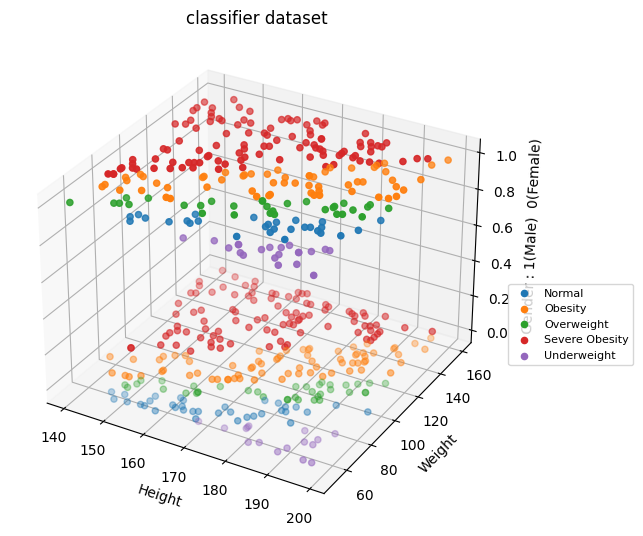

In [14]:
groups = data.groupby('Status')

from mpl_toolkits.mplot3d import Axes3D
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.Binary, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender : 1(Male)  0(Female)')
ax.set_title('classifier dataset')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5), prop={'size': 8})
plt.show()

In [15]:
data_visual_male = data[data['Gender']=='Male']
data_visual_male_categories = data_visual_male['Status'].value_counts()
data_visual_male_categories

Severe Obesity    106
Obesity            59
Overweight         31
Normal             28
Underweight        21
Name: Status, dtype: int64

In [16]:
data_visual_female = data[data['Gender']=='Female']
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Severe Obesity    96
Obesity           71
Overweight        37
Normal            35
Underweight       16
Name: Status, dtype: int64

Text(0, 0, 'Male')

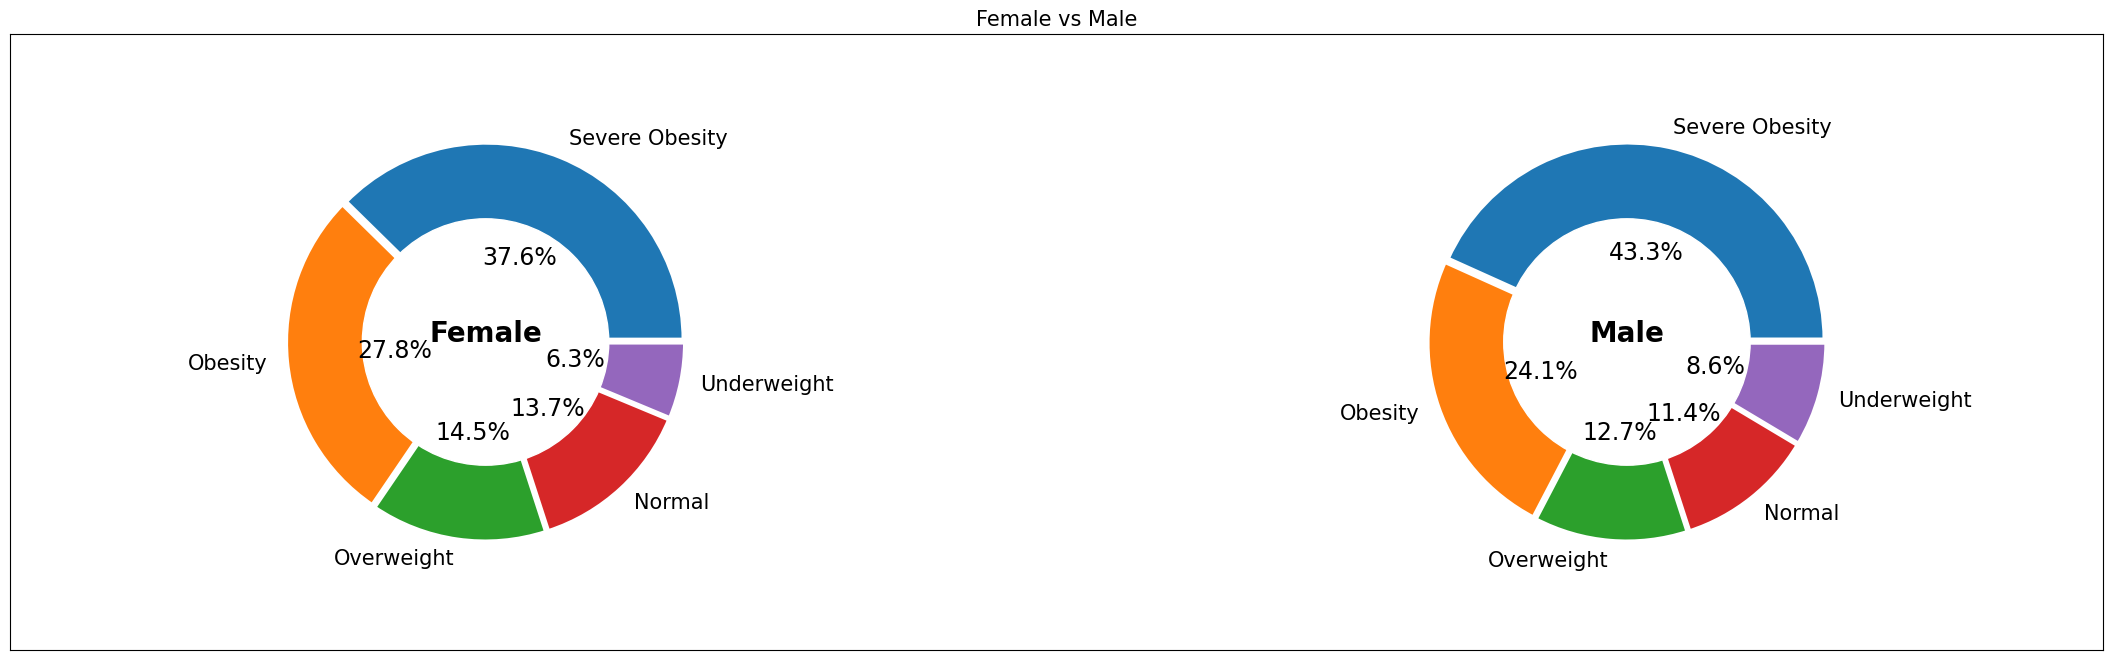

In [17]:
fig = plt.figure(figsize=(27,8))
plt.title("Female vs Male",loc='center',weight=10,size=15)
plt.xticks([]) # to disable xticks
plt.yticks([]) # to disable yticks

# female
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,0.01,0.01,0.01,0.01)

wedges, texts, autotexts =  ax1.pie(data_visual_female_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Severe Obesity','Obesity','Overweight','Normal','Underweight'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax1.text(0,0,'Female',size=20,color='#000000',horizontalalignment='center',weight='bold')

# male
ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,0.01,0.01,0.01,0.01)
wedges2, texts2, autotexts2 =  ax2.pie(data_visual_male_categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Severe Obesity','Obesity','Overweight','Normal','Underweight'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.45,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
ax2.text(0,0,'Male',size=20,color='#000000',horizontalalignment='center',weight='bold')

### **MODEL (Capability Classifier)**

In [18]:
pip install tf-models-nightly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 17.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.9/488.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 61.9 MB/s eta 0:00:00
   

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers
tf.__version__

'2.14.0-dev20230605'

In [20]:
data

,Gender,Binary,Weight,Height,BMI,Status,Physical_Type
0,Male,1,96,174,31.708284,Obesity,4
1,Male,1,87,189,24.355421,Normal,2
2,Female,0,110,185,32.140248,Obesity,4
3,Female,0,104,195,27.350427,Overweight,3
4,Male,1,61,149,27.476240,Overweight,3
...,...,...,...,...,...,...,...
495,Female,0,153,150,68.000000,Severe Obesity,5
496,Female,0,121,184,35.739603,Obesity,4
497,Female,0,136,141,68.407022,Severe Obesity,5
498,Male,1,95,150,42.222222,Severe Obesity,5


In [21]:
# Drop unused features.
dataframe = data.drop(columns=['Gender'])
dataframe.rename(columns={'Physical_Type': 'target'}, inplace=True)
dataframe['target'] = np.where(dataframe['target']==2 , 1, 0)

In [22]:
dataframe.head(10)

,Binary,Weight,Height,BMI,Status,target
0,1,96,174,31.708284,Obesity,0
1,1,87,189,24.355421,Normal,1
2,0,110,185,32.140248,Obesity,0
3,0,104,195,27.350427,Overweight,0
4,1,61,149,27.476240,Overweight,0
5,1,104,189,29.114526,Overweight,0
6,1,92,147,42.574853,Severe Obesity,0
7,1,111,154,46.803846,Severe Obesity,0
8,1,90,174,29.726516,Overweight,0
9,0,103,169,36.063163,Obesity,0


In [23]:
train, val, test = np.split(dataframe.sample(frac=1), [int(0.8*len(dataframe)), int(0.9*len(dataframe))])
print(len(train), 'training examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


400 training examples
50 validation examples
50 test examples


In [24]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('target')
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [25]:
batch_size = 5
train_ds = df_to_dataset(train, batch_size=batch_size)

<ipython-input-24-47dd34a56d8b>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [26]:
[(train_features, label_batch)] = train_ds.take(1)
print('Every feature:', list(train_features.keys()))
print('A batch of bmi:', train_features['BMI'])
print('A batch of targets:', label_batch )

Every feature: ['Binary', 'Weight', 'Height', 'BMI', 'Status', 'target']
A batch of bmi: tf.Tensor(
[[27.39800347]
 [36.50621958]
 [64.        ]
 [32.421875  ]
 [39.68151717]], shape=(5, 1), dtype=float64)
A batch of targets: tf.Tensor([0 0 0 0 0], shape=(5,), dtype=int64)


In [27]:
def get_normalization_layer(name, dataset):
  
  normalizer = layers.Normalization(axis=None)
  feature_ds = dataset.map(lambda x, y: x[name])
  normalizer.adapt(feature_ds)

  return normalizer

In [28]:
def get_category_encoding_layer(name, dataset, dtype, max_tokens=None):
  
  if dtype == 'string':
    index = layers.StringLookup(max_tokens=max_tokens)
  else:
    index = layers.IntegerLookup(max_tokens=max_tokens)
  
  feature_ds = dataset.map(lambda x, y: x[name])
  index.adapt(feature_ds)
  encoder = layers.CategoryEncoding(num_tokens=index.vocabulary_size())

  return lambda feature: encoder(index(feature))

In [29]:
batch_size = 5
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

<ipython-input-24-47dd34a56d8b>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
<ipython-input-24-47dd34a56d8b>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}


In [30]:
#NUMERICAL COLS

all_inputs = []
encoded_features = []

numerical_cols = ['Binary', 'BMI', 'Weight', 'Height']

for header in numerical_cols:
  
  normalization_layer = get_normalization_layer(header, train_ds)
  
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  encoded_numeric_col = normalization_layer(numeric_col)
  
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

#CATEGORICAL COLS

categorical_cols = ['Status']

for header in categorical_cols:
  categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='string')
  encoding_layer = get_category_encoding_layer(name=header,
                                               dataset=train_ds,
                                               dtype='string',
                                               max_tokens=5)
  encoded_categorical_col = encoding_layer(categorical_col)
  all_inputs.append(categorical_col)
  encoded_features.append(encoded_categorical_col)

In [31]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(24, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(all_inputs, output)

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

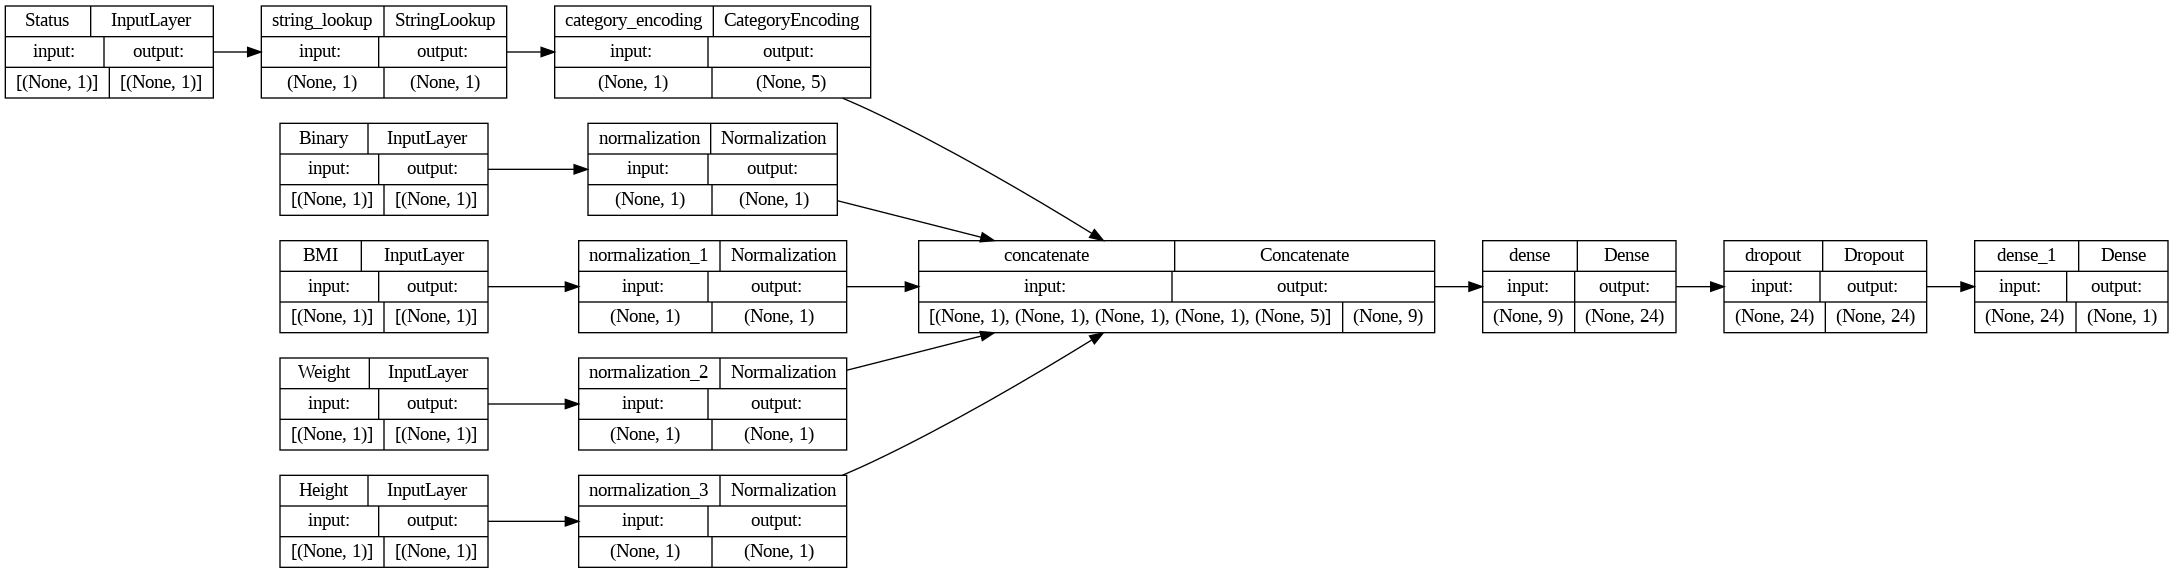

In [33]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [34]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['target'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


80/80 [==============================] - 1s 8ms/step - loss: 0.7990 - accuracy: 0.6550 - val_loss: 0.6353 - val_accuracy: 0.8200
Epoch 2/10
80/80 [==============================] - 0s 3ms/step - loss: 0.5708 - accuracy: 0.8325 - val_loss: 0.4841 - val_accuracy: 0.8200
Epoch 3/10
80/80 [==============================] - 0s 3ms/step - loss: 0.4415 - accuracy: 0.8800 - val_loss: 0.3947 - val_accuracy: 0.8200
Epoch 4/10
80/80 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8875 - val_loss: 0.3347 - val_accuracy: 0.8200
Epoch 5/10
80/80 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8825 - val_loss: 0.2893 - val_accuracy: 0.8200
Epoch 6/10
80/80 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.8925 - val_loss: 0.2537 - val_accuracy: 0.8200
Epoch 7/10
80/80 [==============================] - 0s 3ms/step - loss: 0.2313 - accuracy: 0.8925 - val_loss: 0.2213 - val_accuracy: 0.8200
Epoch 8/10
80/80 [=============

In [35]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

10/10 [==============================] - 0s 3ms/step - loss: 0.1357 - accuracy: 0.9800
Accuracy 0.9800000190734863


In [36]:
model.save('Capability Classifier')
model.save('Capability Classifier.keras')

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/Capability Classifier')
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
  tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
]
tflite_model = converter.convert()
print('Model size: %dKB' % (len(tflite_model) / 1024))


open("Capability_Classifier.tflite", "wb").write(tflite_model)

A Test

In [39]:
reloaded_model = tf.keras.models.load_model('Capability Classifier.keras')

In [40]:
#Gender = str(input("What's your gender? (M/F): "))
Weight = 50    
#float(input("What's your weight : "))
Height = 177 
#float(input("What's your height: "))

In [41]:
def Binary(G):
    if G == 'M':
        return 1
    elif G == 'F':
        return 0

def BMI(H,W):
        return W/((H/100)**2)

def Status(x):
    if x < 18.75:
        return 'Underweight'
    elif x >= 18.75 and x < 25:
        return 'Normal'
    elif x >= 25 and x < 30:
        return 'Overweight'
    elif x >= 30 and  x < 40:
        return 'Obesity'
    elif x >= 40:
        return 'Severe Obesity'
    

In [42]:
print(BMI(Height, Weight))

15.959653994701394


In [43]:
sample = {
    'Binary': 1,
    'Weight': Weight,
    'Height': Height,
    'BMI': BMI(Height, Weight),
    'Status': Status(BMI(Height, Weight)),
}

input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = reloaded_model.predict(input_dict)

prob = tf.nn.sigmoid(predictions[0])

print(
    "The user has a %.8f percent probability "
    "of being considered capable." % (100 * prob)
)

1/1 [==============================] - 0s 188ms/step
The user has a 19.62999725 percent probability of being considered capable.
